# Hands Signs Dataset

* The dataset format is patterned to match closely with the classic MNIST.
<br>
* Each training and test case represents a **label (0-25)** as a one-to-one map for each alphabet letter A-Z (and no cases for 9=J or 25=Z because of gesture motions).<br> 
* The training data **(27,455 cases)** and test data **(7172 cases)** are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single **28x28** pixel image with grayscale values between 0-255.<br>
* The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. <br><br>
* This is what the data looks like:

![Label Images](hand_gestures.png "Data")<br>
## Dataset Description:<br>
Each image is **28** pixels in height and **28** pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.<br>
## Objectives:

* View the data as an image
* Train different classifiers
* Compare performance for different classifiers using various metrics

## Importing the Required Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
import datetime

## Loading the Data

In [4]:
hand_sign=pd.read_csv('sign_mnist_train.csv')

In [5]:
#Print first 5 rows of the data
hand_sign.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
hand_sign.shape

(27455, 785)

In [7]:
hand_sign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [10]:
label=hand_sign['label']

In [14]:
#Print first five rows of label
label[0:5]

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [15]:
#Dropping the label column from the data
hand_sign.drop(['label'],inplace=True,axis=1)

In [16]:
hand_sign.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [20]:
#Printing shape of label and data
print(hand_sign.shape)
print(label.shape)

(27455, 784)
(27455,)


## Viewing tha Data as Image

In [21]:
#Transforming a data point into a 28*28 matrix 
image=np.empty(shape=(28,28),dtype=int)
k=0
j=0
for i in range(0,28):
    for k in range(0,28):
        image[i,k]=hand_sign.iat[0,i*28+k]
        

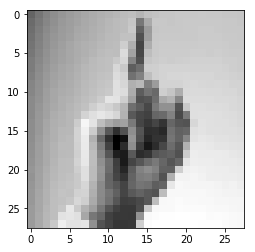

In [26]:
#Viewing the matrix as a image using imshow
plt.imshow(image,cmap=cmap)
plt.show()

In [28]:
print('Actual class label is :',label[0])

Actual class label is : 3


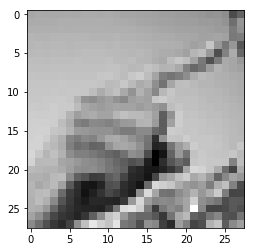

In [30]:
image2=np.empty(shape=(28,28),dtype=int)
k=0
j=0
for i in range(0,28):
    for k in range(0,28):
        image[i,k]=hand_sign.iat[1,i*28+k]
plt.imshow(image,cmap=cmap)
plt.show()


In [31]:
print('Actual class label is :',label[1])

Actual class label is : 6


## Train-Test Split
Splitting the data into two parts i.e train which will be used for training and second part test which will be used for testing.

In [33]:
train_x , test_x , train_y , test_y = train_test_split(hand_sign , label , test_size = 0.3 , random_state =0)

## Dimensionality Reduction

Here our data has 784 dimensions so we can apply dimensionality reduction techniques to reduce the dimensions.Having too many dimensions can make training of model slow and may lead to inaccurate results

### PCA(Principle Component Analysis)


In [34]:
from sklearn import decomposition
pca = decomposition.PCA()

In [36]:
#Keep the resulting number of dimensions to 2
pca.n_components = 2
pca_data = pca.fit_transform(hand_sign)

print("Reduced PCA shape = ", pca_data.shape)

Reduced PCA shape =  (27455, 2)


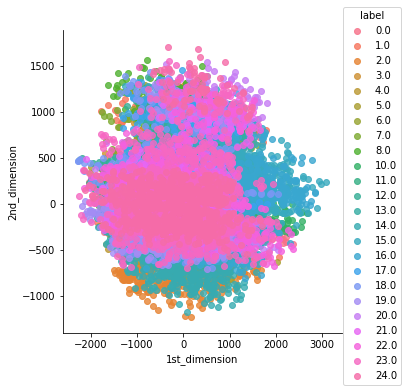

In [54]:
pca_dat = np.vstack((pca_data.T, label)).T
pca_df = pd.DataFrame(data=pca_dat, columns=("1st_dimension", "2nd_dimension", "label"))
sns.lmplot('1st_dimension', '2nd_dimension', data=pca_df, hue='label', fit_reg=False)
plt.show()

### Comparing the original image with the image after apllying PCA

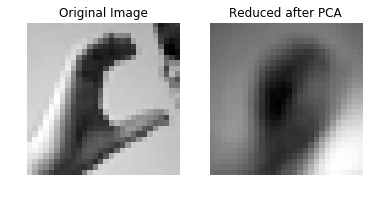

In [53]:
data=np.array(hand_sign)
image= data[2]
image.shape = (28,28)


a = plt.subplot(1,2,1)
a.set_title('Original Image')
plt.imshow(image,cmap=plt.cm.gray)
plt.axis("off")

image = pca.inverse_transform(pca_data[2])
image.shape = (28,28)

b = plt.subplot(1,2,2)
b.set_title("Reduced after PCA")
plt.imshow(image,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

## t-SNE (T-Distributed Stochastic Neighbouring Entities)

t-Sne is a more advanced technique than PCA and it preserves the pattern of data too.

In [56]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2).fit_transform(hand_sign)
print(tsne.shape)

(27455, 2)


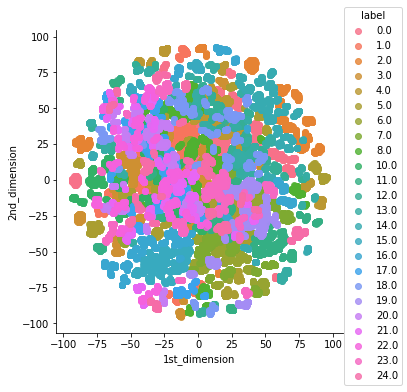

In [57]:
tsne_data = np.vstack((tsne.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("1st_dimension", "2nd_dimension", "label"))
sns.lmplot('1st_dimension', '2nd_dimension', data=tsne_df, hue='label', fit_reg=False)
plt.show()

#### We can easily see the diffrence between the plot of PCA and that of t-Sne .In t-Sne the labels can be easily distinguished from each other while in PCA many of the labels are just grouped together

## Data Modelling

### 1-Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
start_time=datetime.datetime.now()
log_regression.fit(train_x , train_y)
end_time=datetime.datetime.now()
lr_learning_time=end_time-start_time
print("Time taken for training Logistic Regression model is :",str(lr_learning_time))

Time taken for training Logistic Regression model is : 0:05:56.510900


In [72]:
start_time=datetime.datetime.now()
pred_y=log_regression.predict(test_x)
end_time=datetime.datetime.now()
lr_prediction_time=end_time-start_time
print("Time taken for prediction by Logistic Regression model is :",str(lr_prediction_time))

Time taken for prediction by Logistic Regression model is : 0:00:00.061662


In [73]:
print(log_regression.score(test_x, test_y))

1.0


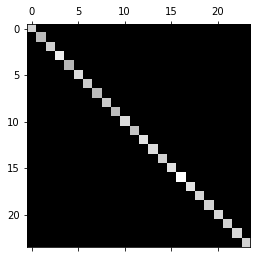

In [76]:
#Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, pred_y)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()

### The whiteness across the diagonal shows the high values that Most of the class were predicted correctly.

In [77]:
#Printing the classification report
import sklearn.metrics as skm
print(skm.classification_report( test_y , pred_y ))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       340
          1       1.00      1.00      1.00       304
          2       1.00      1.00      1.00       337
          3       1.00      1.00      1.00       385
          4       1.00      1.00      1.00       295
          5       1.00      1.00      1.00       357
          6       1.00      1.00      1.00       331
          7       1.00      1.00      1.00       304
          8       1.00      1.00      1.00       327
         10       1.00      1.00      1.00       306
         11       1.00      1.00      1.00       358
         12       1.00      1.00      1.00       317
         13       1.00      1.00      1.00       366
         14       1.00      1.00      1.00       357
         15       1.00      1.00      1.00       339
         16       1.00      1.00      1.00       365
         17       1.00      1.00      1.00       414
         18       1.00      1.00      1.00   

## 2- Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini')
start_time=datetime.datetime.now()
tree.fit(train_x , train_y)
end_time=datetime.datetime.now()
tree_learning_time=end_time-start_time
print("Time taken for training Decision Tree model is :",str(tree_learning_time))

Time taken for training Decision Tree model is : 0:00:13.525922


In [88]:
start_time=datetime.datetime.now()
pred_y=tree.predict(test_x)
end_time=datetime.datetime.now()
tree_prediction_time=end_time-start_time
print("Time taken for prediction by Decision Tree model is :",str(tree_prediction_time))

Time taken for prediction by Decision Tree model is : 0:00:00.032085


In [89]:
print(tree.score(test_x, test_y))

0.8651207964064587


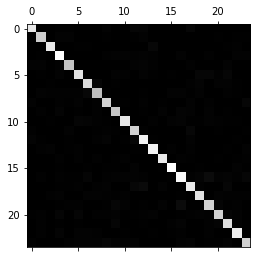

In [90]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, pred_y)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()

In [91]:
#Printing the classification report
import sklearn.metrics as skm
print(skm.classification_report( test_y , pred_y ))

             precision    recall  f1-score   support

          0       0.91      0.90      0.90       340
          1       0.88      0.90      0.89       304
          2       0.94      0.91      0.93       337
          3       0.85      0.88      0.86       385
          4       0.88      0.88      0.88       295
          5       0.84      0.84      0.84       357
          6       0.87      0.88      0.87       331
          7       0.83      0.83      0.83       304
          8       0.84      0.86      0.85       327
         10       0.84      0.86      0.85       306
         11       0.88      0.85      0.87       358
         12       0.83      0.88      0.85       317
         13       0.83      0.88      0.85       366
         14       0.90      0.90      0.90       357
         15       0.94      0.91      0.93       339
         16       0.93      0.93      0.93       365
         17       0.84      0.79      0.82       414
         18       0.83      0.84      0.83   

##  3- Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_jobs=2,random_state=0,criterion='gini')

In [93]:
start_time=datetime.datetime.now()
random_forest.fit(train_x , train_y)
end_time=datetime.datetime.now()
rf_learning_time=end_time-start_time
print("Time taken for training Random Forest model is :",str(rf_learning_time))

Time taken for training Random Forest model is : 0:00:02.179826


In [98]:
start_time=datetime.datetime.now()
pred_y=random_forest.predict(test_x)
end_time=datetime.datetime.now()
rf_prediction_time=end_time-start_time
print("Time taken for prediction by Decision Tree model is :",str(rf_prediction_time))

Time taken for prediction by Decision Tree model is : 0:00:00.140808


In [99]:
print(random_forest.score(test_x, test_y))

0.9763263324025737


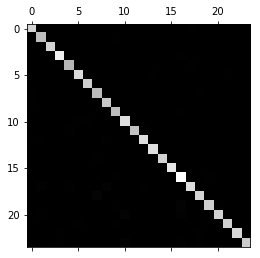

In [100]:
cf= confusion_matrix(test_y, pred_y)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()

In [101]:
#Printing the classification report
import sklearn.metrics as skm
print(skm.classification_report( test_y , pred_y ))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       340
          1       0.96      0.99      0.98       304
          2       0.99      1.00      0.99       337
          3       0.97      0.98      0.98       385
          4       0.98      0.98      0.98       295
          5       0.99      0.97      0.98       357
          6       0.98      0.98      0.98       331
          7       0.96      0.98      0.97       304
          8       0.96      0.97      0.97       327
         10       0.96      0.99      0.98       306
         11       0.96      0.98      0.97       358
         12       0.98      0.97      0.98       317
         13       0.98      0.96      0.97       366
         14       0.99      0.99      0.99       357
         15       0.98      0.98      0.98       339
         16       0.99      1.00      1.00       365
         17       0.96      0.98      0.97       414
         18       0.98      0.95      0.97   

## 4-Support Vector Machine(Polynomial Kernel)

In [117]:
from sklearn.svm import SVC
svc_poly=SVC(kernel='poly',degree=6)

In [118]:
start_time=datetime.datetime.now()
svc_poly.fit(train_x , train_y)
end_time=datetime.datetime.now()
svm_learning_time=end_time-start_time
print("Time taken for training SVM model is :",str(svm_learning_time))

Time taken for training SVM model is : 0:00:39.374266


In [128]:
start_time=datetime.datetime.now()
pred_y=svc_poly.predict(test_x)
end_time=datetime.datetime.now()
svm_prediction_time=end_time-start_time
print("Time taken for prediction by SVM model is :",str(svm_prediction_time))

Time taken for prediction by SVM model is : 0:00:14.847183


In [121]:
print(svc_poly.score(test_x, test_y))

0.9980575452227752


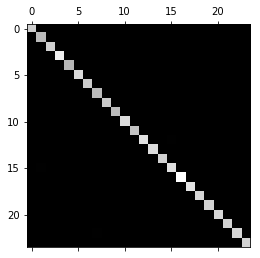

In [122]:
cf= confusion_matrix(test_y, pred_y)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()

In [123]:
import sklearn.metrics as skm
print(skm.classification_report( test_y , pred_y ))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       340
          1       0.99      1.00      1.00       304
          2       1.00      1.00      1.00       337
          3       1.00      1.00      1.00       385
          4       1.00      1.00      1.00       295
          5       1.00      0.99      1.00       357
          6       1.00      1.00      1.00       331
          7       0.99      1.00      1.00       304
          8       1.00      1.00      1.00       327
         10       1.00      1.00      1.00       306
         11       1.00      1.00      1.00       358
         12       1.00      1.00      1.00       317
         13       0.99      0.99      0.99       366
         14       1.00      1.00      1.00       357
         15       1.00      1.00      1.00       339
         16       0.99      0.99      0.99       365
         17       1.00      1.00      1.00       414
         18       1.00      0.99      1.00   

## KNeighborsClassifier

In [124]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)

In [125]:
start_time=datetime.datetime.now()
KNN.fit(train_x , train_y)
end_time=datetime.datetime.now()
knn_learning_time=end_time-start_time
print("Time taken for training KNN model is :",str(knn_learning_time))

Time taken for training KNN model is : 0:00:01.149023


In [127]:
start_time=datetime.datetime.now()
pred_y=KNN.predict(test_x)
end_time=datetime.datetime.now()
knn_prediction_time=end_time-start_time
print("Time taken for prediction by KNN model is :",str(knn_prediction_time))

Time taken for prediction by KNN model is : 0:01:52.743957


In [130]:
print(KNN.score(test_x, test_y))

0.9969649144105864


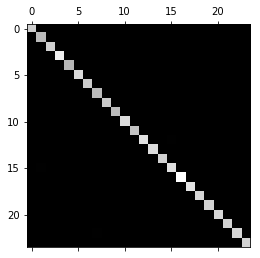

In [131]:
cf= confusion_matrix(test_y, pred_y)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()

In [132]:
import sklearn.metrics as skm
print(skm.classification_report( test_y , pred_y ))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       340
          1       0.99      1.00      1.00       304
          2       1.00      1.00      1.00       337
          3       1.00      1.00      1.00       385
          4       1.00      1.00      1.00       295
          5       1.00      0.99      1.00       357
          6       1.00      1.00      1.00       331
          7       0.99      1.00      1.00       304
          8       1.00      1.00      1.00       327
         10       1.00      1.00      1.00       306
         11       1.00      1.00      1.00       358
         12       1.00      1.00      1.00       317
         13       0.99      0.99      0.99       366
         14       1.00      1.00      1.00       357
         15       1.00      1.00      1.00       339
         16       0.99      0.99      0.99       365
         17       1.00      1.00      1.00       414
         18       1.00      0.99      1.00   

## Comparison of All Algorithms

### We are using diffrent criterias for evaluating the algorithms applied:
* Accuracy
* Training time
* Prediction time

In [138]:
Accuracy=[1.0,0.8651207964064587,0.9763263324025737,0.9980575452227752,0.9969649144105864]
Train_time=[356.510,13.525,2.179,39.374,1.149]
Prediction_time=[0.06166,0.03208,0.14080,14.847,1.1490]

In [140]:
data = { 'Accuracy' : Accuracy,
         'Train_Time': Train_time,
         'Prediction': Prediction_time,
         'Algorithm': ['Logistic Regression','Decision Tree','Random Forest','SVM polynomial','KNeighbors']}
df = pd.DataFrame( data)

### Comparison based on accuracy

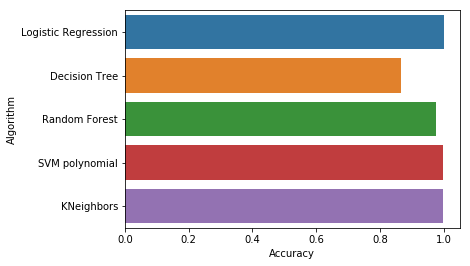

In [141]:
sns.barplot(x = df.Accuracy, y = df.Algorithm)

### Comparison based on Training Time

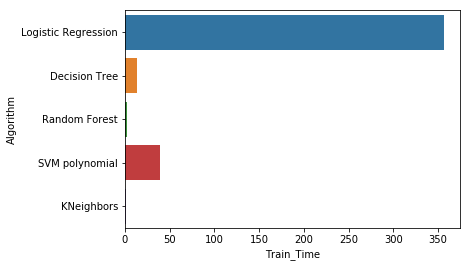

In [144]:
sns.barplot(x = df.Train_Time, y = df.Algorithm)

### Comparison based on prediction time

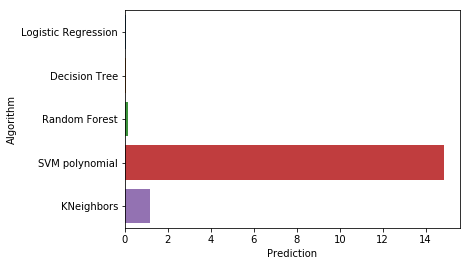

In [146]:
sns.barplot(x = df.Prediction, y = df.Algorithm)